# Basic Linear Systems - Tutorial

**Part 1:** Convolution - deconvolution

In [2]:
# Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### I. Convolution

Let us illustrate the concept in a simple way

** Exercise: ** a. Change the half width of the Gaussian signal, b. modify the the Green's function g(t)

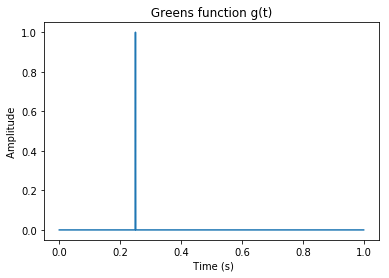

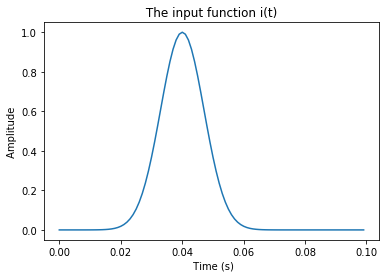

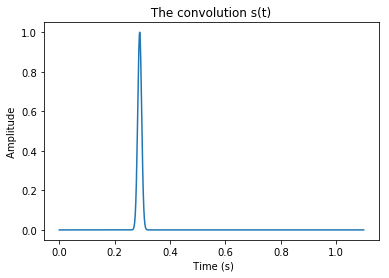

In [3]:
# Let is initialize a time-dependendt function with a peak
nt = 1000                  # Number of time steps 
t = np.linspace(0,1,nt)     # initialize time with a sampling rate of 1 kHz
g = np.zeros(nt)            # this is our time-dependent function (set to zero), mimicking a Green's function (impulse response)
dt = t[1]-t[0]             # sampling interval

# Let us initialize at one point 
g[250] = 1.

# Let us define an (arbitrary)input function, because it is simple we use a shifted Gaussian
a = 10*dt               # Gaussian half width
t0 = 4*a                # Gaussian shifted away from 0, peak at t0
n = int(10*a/dt)           # how man points to I need?
i = np.zeros(n)         # initialize i, note it has note the same length as g and t

# Initialize Gauss function (only for necessary length)
i = np.exp(-1./a**2 * (t[:np.size(i)] -t0)**2)

# Now calculate convolution of g with i 
s = np.convolve(g,i)
tc = np.arange(np.size(s))*dt


# Let us plot all functions
plt.plot(t,g)
plt.title(' Greens function g(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.show()

plt.plot(t[:np.size(i)],i)
plt.title(' The input function i(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.show()

plt.plot(tc,s)
plt.title(' The convolution s(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.show()



Note that the convolution is (always) longer than the original signal (remember the equation)!

** Let us generate a more interesting Green's function mimicking a vertical reflectivity profile and its reflection response **

** Exercise: ** Uncomment the line initializing a random Green's function. The resulting convolution looks quite like  a real seismogram, right? Play around with the synthetic Green's function!

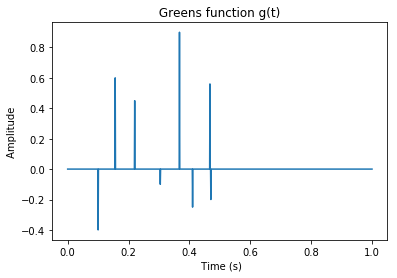

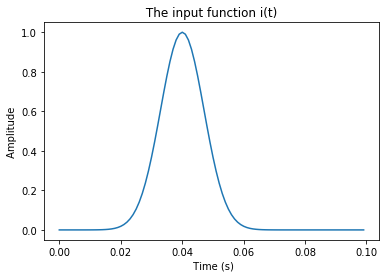

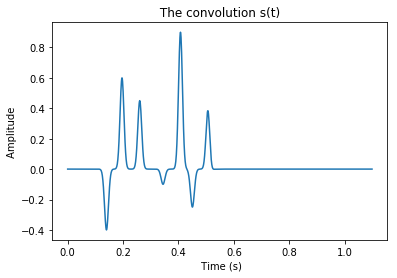

In [4]:
# We re-initialize our previous Green's function g(t) 
g = np.zeros(nt)            # this is our time-dependent function (set to zero), mimicking a Green's function (impulse response)

# Along g(t) we initialize random positive and negative amplitude arrival coming from deep interfaces (interval -1, 1)
g[100] = -.4
g[156] = .6
g[220] = .45
g[304] = -.1
g[367] = .9
g[410] = -.25
g[467] = .56
g[470] = -.2

# Random Green's function
#g = np.random.rand(nt)-.5

# Now calculate convolution of g with i (same source function as above)
s = np.convolve(g,i)
tc = np.arange(np.size(s))*dt


# Let us plot all functions
plt.plot(t,g)
plt.title(' Greens function g(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.show()

plt.plot(t[:np.size(i)],i)
plt.title(' The input function i(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.show()

plt.plot(tc,s)
plt.title(' The convolution s(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.show()



** Now let us try to proof the convolution theorem ** 

Please spend some time with this, explore the code, appreciate what happens! Amazing!

Exercise: Convole g with i using the np.convolve function and compare (l2 Norm) with s, any difference? 

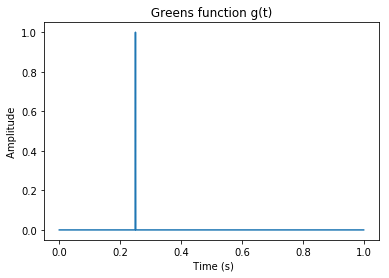

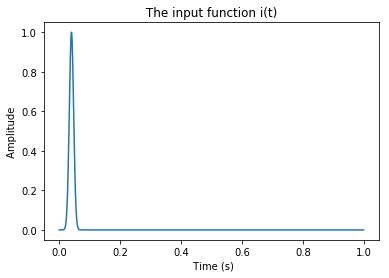

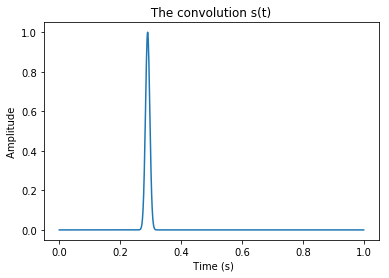

In [5]:
# Let us transform the functions into the Fourier domain, for this exercise the two functions need to be sampled with the 
# same number of points and sampling rate


# Let is initialize a time-dependendt function with a peak
nt = 1000                  # Number of time steps 
t = np.linspace(0,1,nt)     # initialize time with a sampling rate of 1 kHz
g = np.zeros(nt)            # this is our time-dependent function (set to zero), mimicking a Green's function (impulse response)
dt = t[1]-t[0]             # sampling interval

# Let us initialize at one point 
g[250] = 1.

# Let us define an (arbitrary)input function, because it is simple we use a shifted Gaussian
a = 10*dt               # Gaussian half width
t0 = 4*a                # Gaussian shifted away from 0, peak at t0
i = np.zeros(nt)         # initialize i, note it has note the same length as g and t

# Initialize Gauss function (only for necessary length)
i = np.exp(-1./a**2 * (t[:np.size(i)] -t0)**2)

########################################################################
# so let s go to the spectral domain (convolution theorem)

G = np.fft.fft(g)        # G is now a complex amplitude and phase spectrum
I = np.fft.fft(i)        # I is now a complex amplitude and phase spectrum

S = G*I                  # This is a multiplication in the frequency domain
########################################################################

s = np.real(np.fft.ifft(S))       # The inverse transform brings us back into the time domain (we strip off the imaginary part)

# Let us plot all functions
plt.plot(t,g)
plt.title(' Greens function g(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.show()

plt.plot(t[:np.size(i)],i)
plt.title(' The input function i(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.show()

plt.plot(t,s)
plt.title(' The convolution s(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.show()


### II. Deconvolution

Let us illustrate the concept in a simple way using the same functions


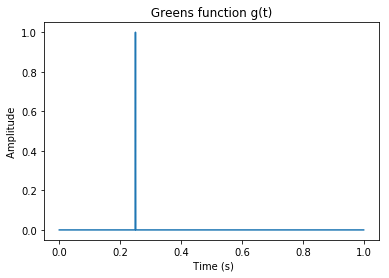

In [6]:
# Let us say we have observations s(t) and we would like to extract 
# the Green's function by deconvolving the known input signal i(t)

# Deconvolution is a spectral ratio!!!!
G = S/I    # Incredibly simple

# back to the time domain
g = np.real(np.fft.ifft(G))

plt.plot(t,g)
plt.title(' Greens function g(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.show()


Does it work in a more complicated case? Let us redo the simple reflectivity example ....  

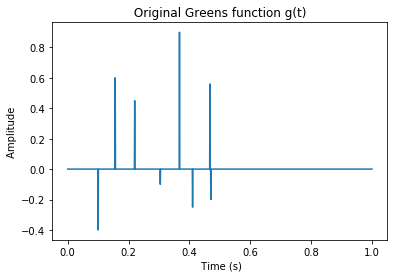

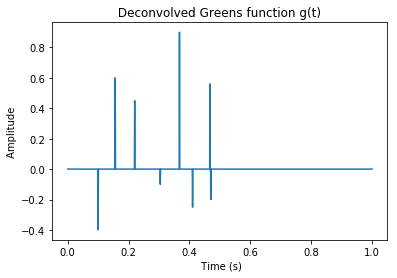

In [7]:
# We re-initialize our previous Green's function g(t) 
g = np.zeros(nt)            # this is our time-dependent function (set to zero), mimicking a Green's function (impulse response)

# Along g(t) we initialize random positive and negative amplitude arrival coming from deep interfaces (interval -1, 1)
g[100] = -.4
g[156] = .6
g[220] = .45
g[304] = -.1
g[367] = .9
g[410] = -.25
g[467] = .56
g[470] = -.2

# Let us generate the response 
s = np.convolve(g,i)

# Technicality but s now has more points, we strip them off
s = s[:np.size(i)]

# Let us transform to spectral domain
S = np.fft.fft(s)

# And now let us deconvolve the input signal
dg = np.real(np.fft.ifft(S/I))

plt.plot(t,g)
plt.title(' Original Greens function g(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.show()

plt.plot(t,dg)
plt.title(' Deconvolved Greens function g(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.show()


# Amazing!

... of course in practice it s more complicated ... 